In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.api.models import Sequential
from keras.api.layers import LSTM, Dense, Dropout
from keras.api.optimizers import Adam


In [3]:
# Data Access
df = pd.read_excel('C:/Users/yunus/Downloads/Data Deneme/Custom-Dataset.xlsx')

In [4]:
# Separate the target variable
target = "BTC_Adj Close"
y = df[[target]] # Target
X = df.drop(columns=[target]) # Features

In [5]:
# Model 2: LSTM
# Normalize the features and the target variable separately
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

In [6]:
# Reshape X for LSTM input [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [8]:
# Define LSTM model
# 1.layer = 256, 2.layer = 128, 3.layer = 64
model = Sequential()
model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

C:\Users\yunus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mean_squared_error')

In [10]:
# Fit the model
# epochs=250
history = model.fit(X_train, y_train, epochs=250, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1087 - val_loss: 0.0760
Epoch 2/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0433 - val_loss: 0.0045
Epoch 3/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 4/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 5/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 6/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 7/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 9.8391e-04
Epoch 9/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 10/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 7.6287e-04
Epoch 11/250
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012 - val_loss: 6.4827e-04
Epoch 12/250
108/108 ━━━━━━━

In [11]:
# Predict on test data
predictions = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [12]:
# Inverse transform the predictions and actual values to original scale
y_test_inv = sc_y.inverse_transform(y_test)
predictions_inv = sc_y.inverse_transform(predictions)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test_inv, predictions_inv)
r2 = r2_score(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)

In [14]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 171969.7957921721
R^2 Score: 0.9995063730197185
Mean Absolute Error: 304.83469990247585


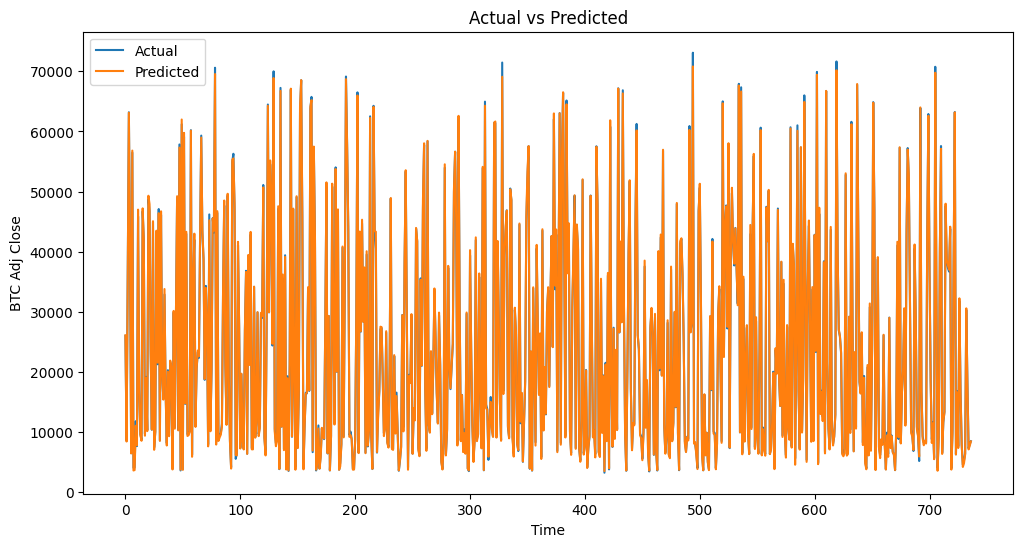

In [15]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('BTC Adj Close')
plt.legend()
plt.show()